# Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la Computación
## Carra: Ingenieria en Computación Inteligente
### Curso: Aprendizaje Inteligente (Machine Learning)
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumno: Diego Alberto Aranda Gonzalez
### Semestre: Enero_Junio del 2024

#### Practica No. 2 Algoritmo del Perceptron Simple Aplicado a la flor de Iris

##### Cargar dos clases de la Flor de Iris (Setosa y Versicolor). Las caracteristicas que tomaremos en cuento son: longitud del petalo y longitud del sepalo.

##### Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

##### Cargamos el Dataset

In [3]:

df = pd.read_csv("C:/Users/diego/Desktop/Universidad/6to-Semestre/Aprendizaje_Inteligente/iris.csv", delimiter=";",decimal=".")

print(df.shape)
print(df.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


##### Extraemos el largo sepal y el largo del pétalo en las columnas 0 y 2. Usaremos solo Setosa y Versicolor

In [4]:
X = df.iloc[0:100, [0, 2]].values
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

##### Seleccionamos Setosa y Versicolor

In [5]:
y = df.iloc[0:100, 4].values
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

##### Convertimos etiquetas a numeros

In [6]:
y = np.where(y == 'setosa', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


##### Creamos un objeto tipo perceptron

In [7]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()

##### Entrenamos el Perceptron

In [8]:
perceptron.fit(X, y)

Perceptron()

##### Predecimos el tipo de Flor

In [9]:
perceptron.predict([[5.7, 4.1],[5.1,1.4]])

array([ 1, -1])

#### Graficamos los datos

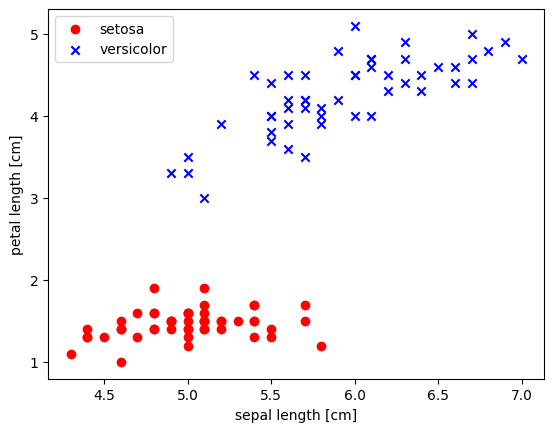

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')
plt.show()

#### Concluciones 

##### En esta practica utilizamos el algoritmo de aprendizaje automatico (Machine Learning) para clasifiacr clases que son linealmente separables (el algoritmo perceptron). El perceptron clasifica diferentes especies de la flor de iris que son linealmente separables. Las caracteristicas qeu se tomaron en cuenta son: longitud del petalo y longitud del sefalo.

### Bibliografia

##### URL: SCIKIT-LEARN (Machine Learning in Python 2024).
##### https://scikit-learn.org/stable/